In [1]:
# ------------------------------ IMPORTS ----------------------------------------- #

# Built-in 
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Own Libs
from utils import read_Tumag
from field_stop_finder import compute_alignment, apply_fieldstop_and_align
from master_dark import compute_master_darks
from master_flatfield import compute_master_flat_field
import image_handler as ih
from demodulation import demodulate
from vlos import cog_profile

In [2]:
#plt.style.use("default")
plt.style.use("dark_background")

In [3]:
# Testeo
darks_c1 = sorted(glob.glob(f"/media/pablo/T7 Touch/TuMAG/FLightData/Darks/*_0_*")) 
darks_c2 = sorted(glob.glob(f"/media/pablo/T7 Touch/TuMAG/FLightData/Darks/*_1_*")) 

flats_c1 = sorted(glob.glob(f"/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/*_0_*")) 
flats_c2 = sorted(glob.glob(f"/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/*_1_*")) 

Obs_folder = "/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.06/24/"
obs_mode = "2.06"

Mag_obs = "/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/1/23/"


pinholes1 = "/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/Spectral_calibration/36"
#pinholes2 = "/home/pablo/Desktop/TuMAGDATA/flare_set_ordered/Spectral_calibration/37"
#pinholes3 = "/home/pablo/Desktop/TuMAGDATA/flare_set_ordered/Spectral_calibration/38"
ph_ims_c1 = sorted(glob.glob(f"{pinholes1}/*_0_*"))
ph_ims_c2 = sorted(glob.glob(f"{pinholes1}/*_1_*"))

#Obs_folder = "/home/pablo/Desktop/TuMAGDATA/flare_set_ordered/1/23/"
#obs_mode = "1"

In [4]:
all_images = sorted(glob.glob(f"{Obs_folder}*"))

ob = ih.nominal_observation(obs_mode, np.array(all_images))
data_fe = ob.get_data()

# Only continuum
info_fe = ob.get_info()

#cont_fe = data[:, -1, :] #/ np.mean(data[:, -1, :])

all_images = sorted(glob.glob(f"{Mag_obs}*"))

ob = ih.nominal_observation("1", np.array(all_images))
data_mg = ob.get_data()

# Only continuum
info_mg = ob.get_info()

#core_mg = data[:, 4, :] # / np.mean(data[:, -1, :])

if obs_mode == "1":
    l0 = 5173

if obs_mode == "2.06":
    l0 = 5250.6

"""wls = np.array(info["lambda_array"]) * 10E-3 + l0
vlos = cog_profile(data[0, :, 0, 200:1750, 200:1750], wave_axis= wls, wave = l0)

plt.figure(figsize = (8, 5))

colors = ["deeppink", "gold", "cyan", "crimson"]
for mod in range(1):
    av_int = []
    left_int = []
    right_int = []
    for i in range(info["Nlambda"]):
        av_int.append(np.mean(data[0, i, mod, 200:1750, 200:1750]))
        left_int.append(np.mean(data[0, i, mod, 250:1750, 200:450]))
        right_int.append(np.mean(data[0, i, mod, 250:1750, 1500:1750]))

    plt.plot(wls, av_int, c = colors[mod], ls = '--', lw = 1, label = "Average Profile.")
    plt.plot(wls, left_int, c = colors[mod], ls = '-', lw = 3, label = "Left Profile.")
    plt.plot(wls, right_int, c = colors[mod], ls = ':', lw = 3, label = "Right Profile.")

#plt.plot([l0, l0], [4000, 14000], c = "k", ls = '--')
plt.tight_layout()
plt.grid(True, alpha = 0.3, c = 'k')

plt.legend()
plt.show()
"""


'wls = np.array(info["lambda_array"]) * 10E-3 + l0\nvlos = cog_profile(data[0, :, 0, 200:1750, 200:1750], wave_axis= wls, wave = l0)\n\nplt.figure(figsize = (8, 5))\n\ncolors = ["deeppink", "gold", "cyan", "crimson"]\nfor mod in range(1):\n    av_int = []\n    left_int = []\n    right_int = []\n    for i in range(info["Nlambda"]):\n        av_int.append(np.mean(data[0, i, mod, 200:1750, 200:1750]))\n        left_int.append(np.mean(data[0, i, mod, 250:1750, 200:450]))\n        right_int.append(np.mean(data[0, i, mod, 250:1750, 1500:1750]))\n\n    plt.plot(wls, av_int, c = colors[mod], ls = \'--\', lw = 1, label = "Average Profile.")\n    plt.plot(wls, left_int, c = colors[mod], ls = \'-\', lw = 3, label = "Left Profile.")\n    plt.plot(wls, right_int, c = colors[mod], ls = \':\', lw = 3, label = "Right Profile.")\n\n#plt.plot([l0, l0], [4000, 14000], c = "k", ls = \'--\')\nplt.tight_layout()\nplt.grid(True, alpha = 0.3, c = \'k\')\n\nplt.legend()\nplt.show()\n'

In [5]:
flats_c1

['/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_45_237_0_1201.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_45_972_0_1217.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_46_708_0_1233.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_47_443_0_1249.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_48_179_0_1265.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_48_914_0_1281.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_49_650_0_1297.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_50_385_0_1313.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/39/2024_07_13_14_52_51_121_0_1329.img',
 '/media/pablo/T7 Touch/TuMAG/FLightData/flare_set_ordered/2.02/

Computing alignment with pinholes..
Computing correlation...
Finding fieldstop field stop...
[1814, 1815, 1814, 1814, 1815]


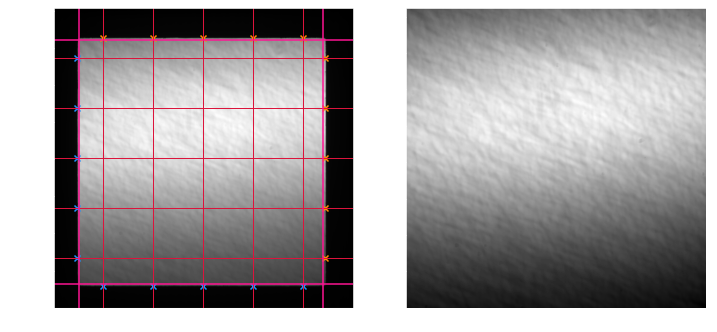

Cam 1 Field stop: [[ 158 1804]
 [ 171 1816]]
Height : 1646
Width : 1645
Field stop computation finished in 0.675s.


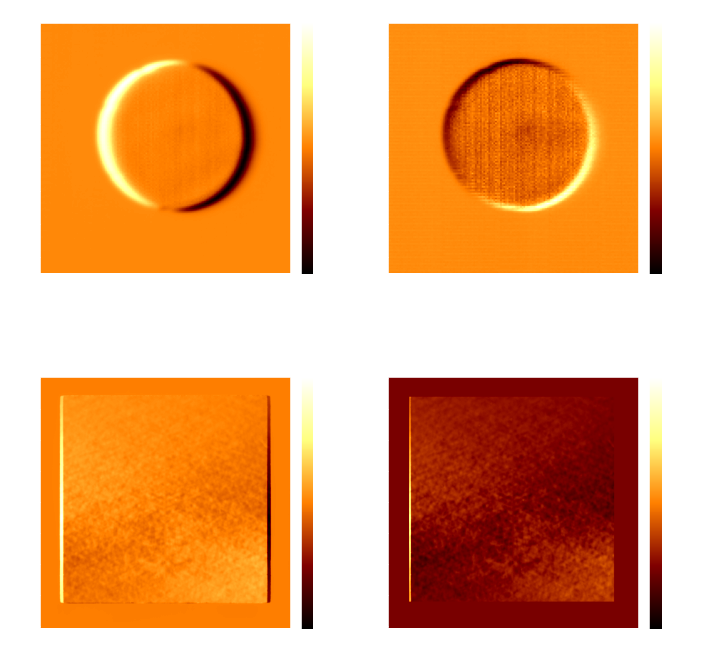

Shift between cameras : X =  -1 - Y - -4 
Computing darks ...
N darks for cam1 : 6
N darks for cam2 : 6
Dark current computed in 0.2 s.
Computing flats ...
N flats for cam1 : 20
N flats for cam2 : 20
Flat-fields computed in 0.705 s.
CAM 1 - Adjusted Height : 1646 - Width : 1645
CAM 2 - Adjusted Height : 1646 - Width : 1645


In [6]:
c1, _ = read_Tumag(flats_c1[0])
c2, _ = read_Tumag(flats_c2[0])
#fs_c1, fs_c2 = compute_alignment(flat_cam1=c1 / np.max(c1), flat_cam2= c2 / np.max(c2), method = 'flats', plot_flag=True, verbose = True)
fs_c1, fs_c2 = compute_alignment(flat_cam1=c1 / np.max(c1), flat_cam2= c2 / np.max(c2), pinhole_c1_path=ph_ims_c1[0], pinhole_c2_path=ph_ims_c2[0], method = 'pinhole', plot_flag=True, verbose = True)


dc = compute_master_darks(darks_c1, darks_c2, verbose = True)
dc = np.zeros((np.shape(dc)))


ff = compute_master_flat_field(flats_c1, flats_c2, dc, verbose = True)

dc[0], dc[1] = apply_fieldstop_and_align(dc[0], dc[1], fs_c1, fs_c2)
ff[0], ff[1] = apply_fieldstop_and_align(ff[0], ff[1], fs_c1, fs_c2)




# 


print(f"CAM 1 - Adjusted Height : {fs_c1[0][1] - fs_c1[0][0]} - Width : {fs_c1[1][1] - fs_c1[1][0]}")
print(f"CAM 2 - Adjusted Height : {fs_c2[0][1] - fs_c2[0][0]} - Width : {fs_c2[1][1] - fs_c2[1][0]}")


/tmp/ipykernel_1370766/885510955.py:36: RuntimeWarning: invalid value encountered in divide
  corrected_fe[1, lamb, mod] = (data_fe[0, lamb, mod] - dc[0]) / ff[0]
/tmp/ipykernel_1370766/885510955.py:37: RuntimeWarning: invalid value encountered in divide
  corrected_fe[0, lamb, mod] = (data_fe[1, lamb, mod] - dc[1]) / ff[1]


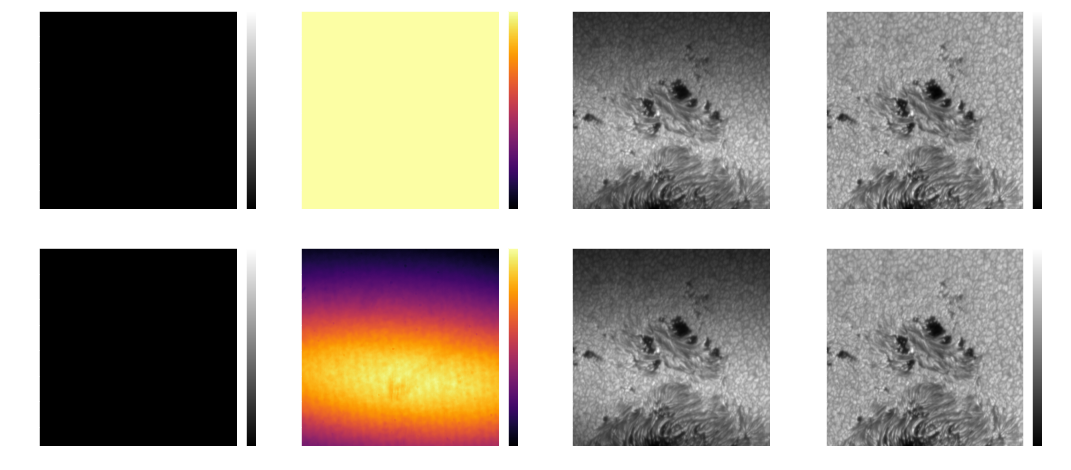

In [7]:
"""
info = ob.get_info()
corrected = np.zeros((2, info["Nmods"], info["Nlambda"], 1666, 1665))

for mod in range(info["Nmods"]):
    for lamb in range(info["Nlambda"]):
        corrected[0, mod, lamb] = (data[0, lamb, mod, fs_obs_c1[0][0]:fs_obs_c1[0][1], fs_obs_c1[1][0]:fs_obs_c1[1][1]] - dc_obs[0, fs_obs_c1[0][0]:fs_obs_c1[0][1], fs_obs_c1[1][0]:fs_obs_c1[1][1]]) / ff[0,fs_obs_c1[0][0]:fs_obs_c1[0][1], fs_obs_c1[1][0]:fs_obs_c1[1][1]]
        corrected[1, mod, lamb] = (data[1, lamb, mod, fs_obs_c2[0][0]:fs_obs_c2[0][1], fs_obs_c2[1][0]:fs_obs_c2[1][1]] - dc_obs[1, fs_obs_c2[0][0]:fs_obs_c2[0][1], fs_obs_c2[1][0]:fs_obs_c2[1][1]]) / ff[1,fs_obs_c2[0][0]:fs_obs_c2[0][1], fs_obs_c2[1][0]:fs_obs_c2[1][1]]

fig, axs = plt.subplots(2, 4, figsize = (18, 8))

axs[0, 0].imshow(dc_obs[0, fs_obs_c1[0][0]:fs_obs_c1[0][1], fs_obs_c1[1][0]:fs_obs_c1[1][1]], vmin = 2000, cmap = "gray")
axs[1, 0].imshow(dc_obs[1, fs_obs_c2[0][0]:fs_obs_c2[0][1], fs_obs_c2[1][0]:fs_obs_c2[1][1]], vmin = 2000, cmap = "gray")

axs[0, 1].imshow(ff[0,fs_obs_c1[0][0]:fs_obs_c1[0][1], fs_obs_c1[1][0]:fs_obs_c1[1][1]], cmap = 'inferno')
axs[1, 1].imshow(ff[1,fs_obs_c2[0][0]:fs_obs_c2[0][1], fs_obs_c2[1][0]:fs_obs_c2[1][1]], cmap = 'inferno')

axs[1, 2].imshow(data[0, 0, -1, fs_obs_c1[0][0]:fs_obs_c1[0][1], fs_obs_c1[1][0]:fs_obs_c1[1][1]], cmap = "gray")#, vmin = np.mean(data[0, 0, -1]) - np.std(data[0, 0, -1]) * 3, vmax = np.mean(data[0, 0, -1]) + 3 * np.std(data[0, 0, -1]))
axs[0, 2].imshow(data[1, 0, -1, fs_obs_c2[0][0]:fs_obs_c2[0][1], fs_obs_c2[1][0]:fs_obs_c2[1][1]], cmap = "gray")#, vmin = np.mean(data[0, 0, -1]) - np.std(data[0, 0, -1]) * 3, vmax = np.mean(data[0, 0, -1]) + 3 * np.std(data[0, 0, -1]))


axs[1, 3].imshow(corrected[0, 0, -1], cmap = "gray", vmin = np.mean(corrected[0, 0, -1]) - np.std(corrected[0, 0, -1]) * 3, vmax = np.mean(corrected[0, 0, -1]) + 3 * np.std(corrected[0, 0, -1]))
axs[0, 3].imshow(corrected[1, 0, -1], cmap = "gray", vmin = np.mean(corrected[1, 0, -1]) - np.std(corrected[1, 0, -1]) * 3, vmax = np.mean(corrected[1, 0, -1]) + 3 * np.std(corrected[1, 0, -1]))

plt.tight_layout()"""

#corrected_fe = np.zeros((2, info["Nmods"], 2016, 2016))
corrected_fe = np.zeros((np.shape(data_fe)))
corrected_mg = np.zeros((np.shape(data_mg)))


for mod in range(info_fe["Nmods"]):
    for lamb in range(info_fe["Nlambda"]):

        data_fe[0, lamb, mod], data_fe[1,  lamb, mod] = apply_fieldstop_and_align(data_fe[0,   lamb, mod], data_fe[1,  lamb,  mod], fs_c1, fs_c2)
        corrected_fe[1, lamb, mod] = (data_fe[0, lamb, mod] - dc[0]) / ff[0]
        corrected_fe[0, lamb, mod] = (data_fe[1, lamb, mod] - dc[1]) / ff[1]

        #data[0, lamb, mod], data[1,lamb, mod] = apply_fieldstop_and_align(data[0, lamb, mod], data[1,lamb, mod], #fs_c1, fs_c2)
        #corrected[1, lamb, mod] = (data[0,lamb,mod] - dc[0]) / ff[0]#
        #corrected[0, lamb, mod] = (data[1,lamb,mod] - dc[1]) / ff[1]

fig, axs = plt.subplots(2, 4, figsize = (18, 8))
im = axs[0, 0].imshow(dc[0, 200:1750, 200:1750], cmap = "gray", vmax = 10000) 
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[1, 0].imshow(dc[1, 200:1750, 200:1750], cmap = "gray", vmax = 10000)
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[0, 1].imshow(ff[0, 200:1750, 200:1750], cmap = 'inferno', vmax = 1)
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[1, 1].imshow(ff[1, 200:1750, 200:1750], cmap = 'inferno')
plt.colorbar(im, fraction=0.046, pad=0.04)

# im = axs[0, 2].imshow(cont_fe[0, 0, 200:1750, 200:1750], cmap = "gray")
# plt.colorbar(im, fraction=0.046, pad=0.04)
# im = axs[1, 2].imshow(cont_fe[1, 0, 200:1750, 200:1750], cmap = "gray")
# plt.colorbar(im, fraction=0.046, pad=0.04)

axs[0, 2].imshow(data_fe[0, -1, 0, 200:1750, 200:1750], cmap = "gray")
axs[1, 2].imshow(data_fe[1, -1, 0, 200:1750, 200:1750], cmap = "gray")

im = axs[0, 3].imshow(corrected_fe[0, -1, 0, 200:1750, 200:1750], cmap = "gray")
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[1, 3].imshow(corrected_fe[1, -1, 0, 200:1750, 200:1750], cmap = "gray")
plt.colorbar(im, fraction=0.046, pad=0.04)







/tmp/ipykernel_1370766/3869243380.py:7: RuntimeWarning: invalid value encountered in divide
  corrected_mg[1, lamb, mod] = (data_mg[0, lamb, mod] - dc[0]) / ff[0]
/tmp/ipykernel_1370766/3869243380.py:8: RuntimeWarning: invalid value encountered in divide
  corrected_mg[0, lamb, mod] = (data_mg[1, lamb, mod] - dc[1]) / ff[1]


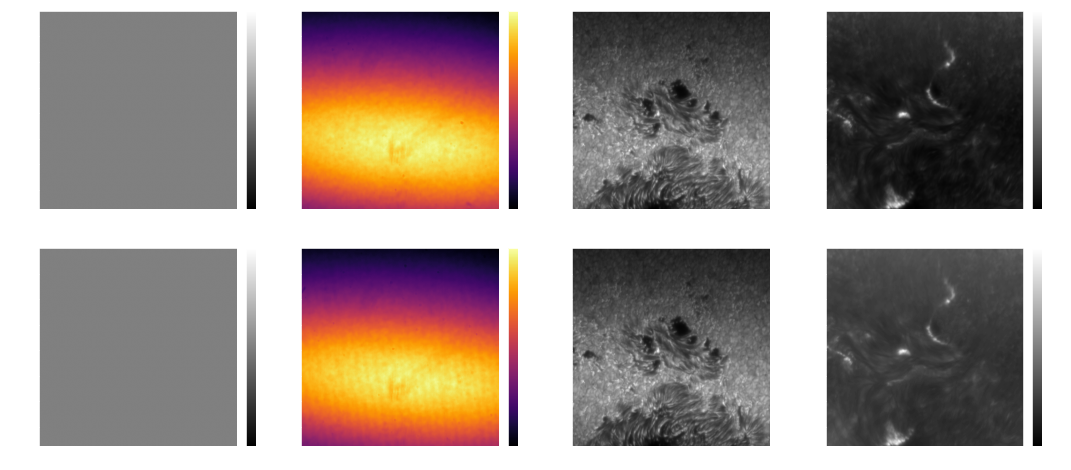

In [8]:
corrected_mg = np.zeros((np.shape(data_mg)))

for mod in range(info_mg["Nmods"]):
    for lamb in range(info_mg["Nlambda"]):

        data_mg[0, lamb, mod], data_mg[1,  lamb, mod] = apply_fieldstop_and_align(data_mg[0, lamb, mod], data_mg[1,  lamb,  mod], fs_c1, fs_c2)
        corrected_mg[1, lamb, mod] = (data_mg[0, lamb, mod] - dc[0]) / ff[0]
        corrected_mg[0, lamb, mod] = (data_mg[1, lamb, mod] - dc[1]) / ff[1]

        #data[0, lamb, mod], data[1,lamb, mod] = apply_fieldstop_and_align(data[0, lamb, mod], data[1,lamb, mod], #fs_c1, fs_c2)
        #corrected[1, lamb, mod] = (data[0,lamb,mod] - dc[0]) / ff[0]#
        #corrected[0, lamb, mod] = (data[1,lamb,mod] - dc[1]) / ff[1]

fig, axs = plt.subplots(2, 4, figsize = (18, 8))
im = axs[0, 0].imshow(dc[0, 200:1750, 200:1750], cmap = "gray")
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[1, 0].imshow(dc[1, 200:1750, 200:1750], cmap = "gray")
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[0, 1].imshow(ff[0, 200:1750, 200:1750], cmap = 'inferno')
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[1, 1].imshow(ff[1, 200:1750, 200:1750], cmap = 'inferno')
plt.colorbar(im, fraction=0.046, pad=0.04)

# im = axs[0, 2].imshow(cont_fe[0, 0, 200:1750, 200:1750], cmap = "gray")
# plt.colorbar(im, fraction=0.046, pad=0.04)
# im = axs[1, 2].imshow(cont_fe[1, 0, 200:1750, 200:1750], cmap = "gray")
# plt.colorbar(im, fraction=0.046, pad=0.04)

axs[0, 2].imshow(data_mg[0, -1, 0, 200:1750, 200:1750], cmap = "gray")
axs[1, 2].imshow(data_mg[1, -1, 0, 200:1750, 200:1750], cmap = "gray")

im = axs[0, 3].imshow(corrected_mg[0, 4, 0, 200:1750, 200:1750], cmap = "gray")
plt.colorbar(im, fraction=0.046, pad=0.04)

im = axs[1, 3].imshow(corrected_mg[1, 4, 0, 200:1750, 200:1750], cmap = "gray", vmin = 0)
plt.colorbar(im, fraction=0.046, pad=0.04)

#del ff, dc



/tmp/ipykernel_1370766/1356684296.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


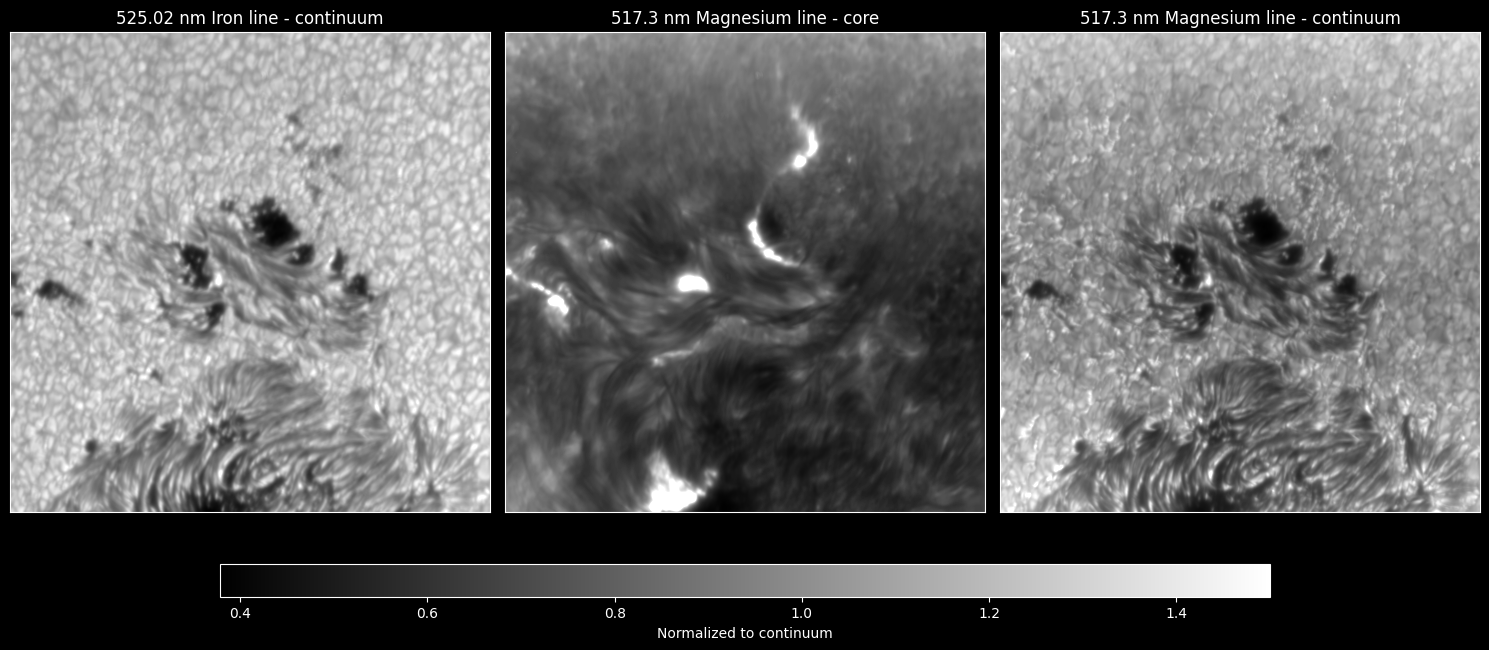

In [51]:
fig, axs = plt.subplots(1, 3, figsize = (15, 6.5))
plt.style.use("dark_background")
im = axs[0].imshow(corrected_fe[0, -1, 0, 200:1750, 200:1750]/ np.mean(corrected_fe[0, -1, 2, 200:1750, 200:1750]), cmap = "gray", vmax = 1.5)
#plt.colorbar(im, fraction=0.046, pad=0.04, label = "Normalized to Continuum")

im = axs[1].imshow(corrected_mg[0, 4, 2, 200:1750, 200:1750] / np.mean(corrected_mg[0, -1, 2, 200:1750, 200:1750]), cmap = "gray", vmax = 1.5)
#lt.colorbar(im, fraction=0.046, pad=0.04, label = "Normalized to Continuum")

im = axs[2].imshow(corrected_mg[0, -1, 2, 200:1750, 200:1750] / np.mean(corrected_mg[0, -1, 2, 200:1750, 200:1750]), cmap = "gray", vmax = 1.5)




np.save("fe.npy", corrected_fe)
np.save("mg.npy", corrected_mg)


fig.subplots_adjust(bottom=0.)  # Adjust the bottom to make space for the colorbar
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])  # Position [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label = "Normalized to continuum")

for i in range(3):
    axs[i].set_yticks([])
    axs[i].set_xticks([])


axs[0].set_title("525.02 nm Iron line - continuum")
axs[1].set_title("517.3 nm Magnesium line - core")
axs[2].set_title("517.3 nm Magnesium line - continuum")

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig("flare_iron_and_magnesium.png", bbox_inches = 'tight')


NameError: name 'corrected' is not defined

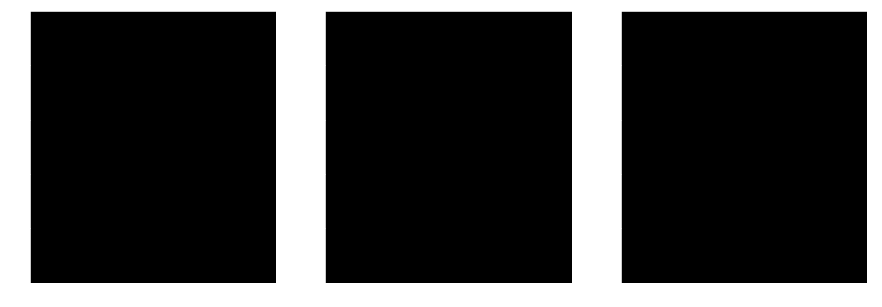

In [11]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

cds_check_x = [950 + 125, 1150] 
cds_check_y = [200, 400 - 125] 

im = axs[0].imshow(corrected[0, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]]   / np.max(corrected[0, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]]), cmap = "gray")
plt.colorbar(im, fraction=0.046, pad=0.04)
im = axs[1].imshow(corrected[1, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]]/ np.max(corrected[0, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]]), cmap = "gray")
plt.colorbar(im, fraction=0.046, pad=0.04)
im = axs[2].imshow(corrected[0, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]] / np.max(corrected[0, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]]) -\
                   corrected[1, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]] / np.max(corrected[1, 0, cds_check_x[0]:cds_check_x[1], cds_check_y[0]:cds_check_y[1]]), cmap = "Spectral")
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.tight_layout()

In [ ]:
"""from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(1, 2, figsize = (15, 7.55))

im1 = axs[0].imshow(corrected[0, -1, 0, 200:1750, 200:1750], cmap = "gray")


l0 = 5173
wls = np.array(info["lambda_array"]) * 1E-3 + l0
vlos = cog_profile(corrected[0, :, 0, 200:1750, 200:1750], wave_axis= wls, wave = l0, cpos = 0)

im2 = axs[1].imshow(vlos, cmap = "bwr")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)


divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax, label = "km/s")

plt.tight_layout()"""

In [ ]:
#demod, dual = demodulate(corrected[:, :, 3], 1666, 1664, 4, 8, filt = "525.02", mode = 'single_wavelength') 
#demod, dual = demodulate(corrected, 2016, 2016, 4, 8, filt = "525.06", mode = 'standard') 
demod, dual = demodulate(corrected, 2016, 2016, 4, 8, filt = "525.06", mode = 'standard_single_wavelength') 

In [ ]:
fig, axs = plt.subplots(2, 4, figsize = (15, 7))

axs[0, 0].imshow(demod[0, 0, 200:1750, 200:1750], cmap = "gray")
axs[0, 1].imshow(demod[0, 1, 200:1750, 200:1750], cmap = "gray")
axs[0, 2].imshow(demod[0, 2, 200:1750, 200:1750], cmap = "gray")
axs[0, 3].imshow(demod[0, 3, 200:1750, 200:1750], cmap = "gray")

axs[1, 0].imshow(demod[1, 0, 200:1750, 200:1750], cmap = "gray")
axs[1, 1].imshow(demod[1, 1, 200:1750, 200:1750], cmap = "gray")
axs[1, 2].imshow(demod[1, 2, 200:1750, 200:1750], cmap = "gray")
axs[1, 3].imshow(demod[1, 3, 200:1750, 200:1750], cmap = "gray")

plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))

axs[0, 0].imshow(dual[0,200:1750, 200:1750], cmap = "gray")
axs[0, 1].imshow(dual[1,200:1750, 200:1750], cmap = "gray")
axs[1, 0].imshow(dual[2,200:1750, 200:1750], cmap = "gray")
axs[1, 1].imshow(dual[3,200:1750, 200:1750], cmap = "gray")


plt.tight_layout()


In [ ]:
np.shape(data[0, :, 0] )
